In [15]:
pip install librosa soundfile matplotlib numpy tqdm datasets[audio] gradio torchaudio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


First 20 samples of the trumpet audio:
[-1.4068222e-03 -4.4607258e-04 -4.1098078e-04  9.9921570e-05
  4.3149794e-05 -1.7485465e-04 -3.6783575e-04  1.4553106e-04
  5.0557934e-04  1.4929953e-03  1.8555210e-03  9.2913181e-04
 -4.0744233e-04 -2.0390307e-03 -1.2686776e-03 -5.3472602e-04
  8.9941110e-04  9.7593543e-04  1.0019976e-03 -1.2960695e-03]

Sampling rate: 22050 Hz
Total samples: 117601
Duration: 5.33 seconds


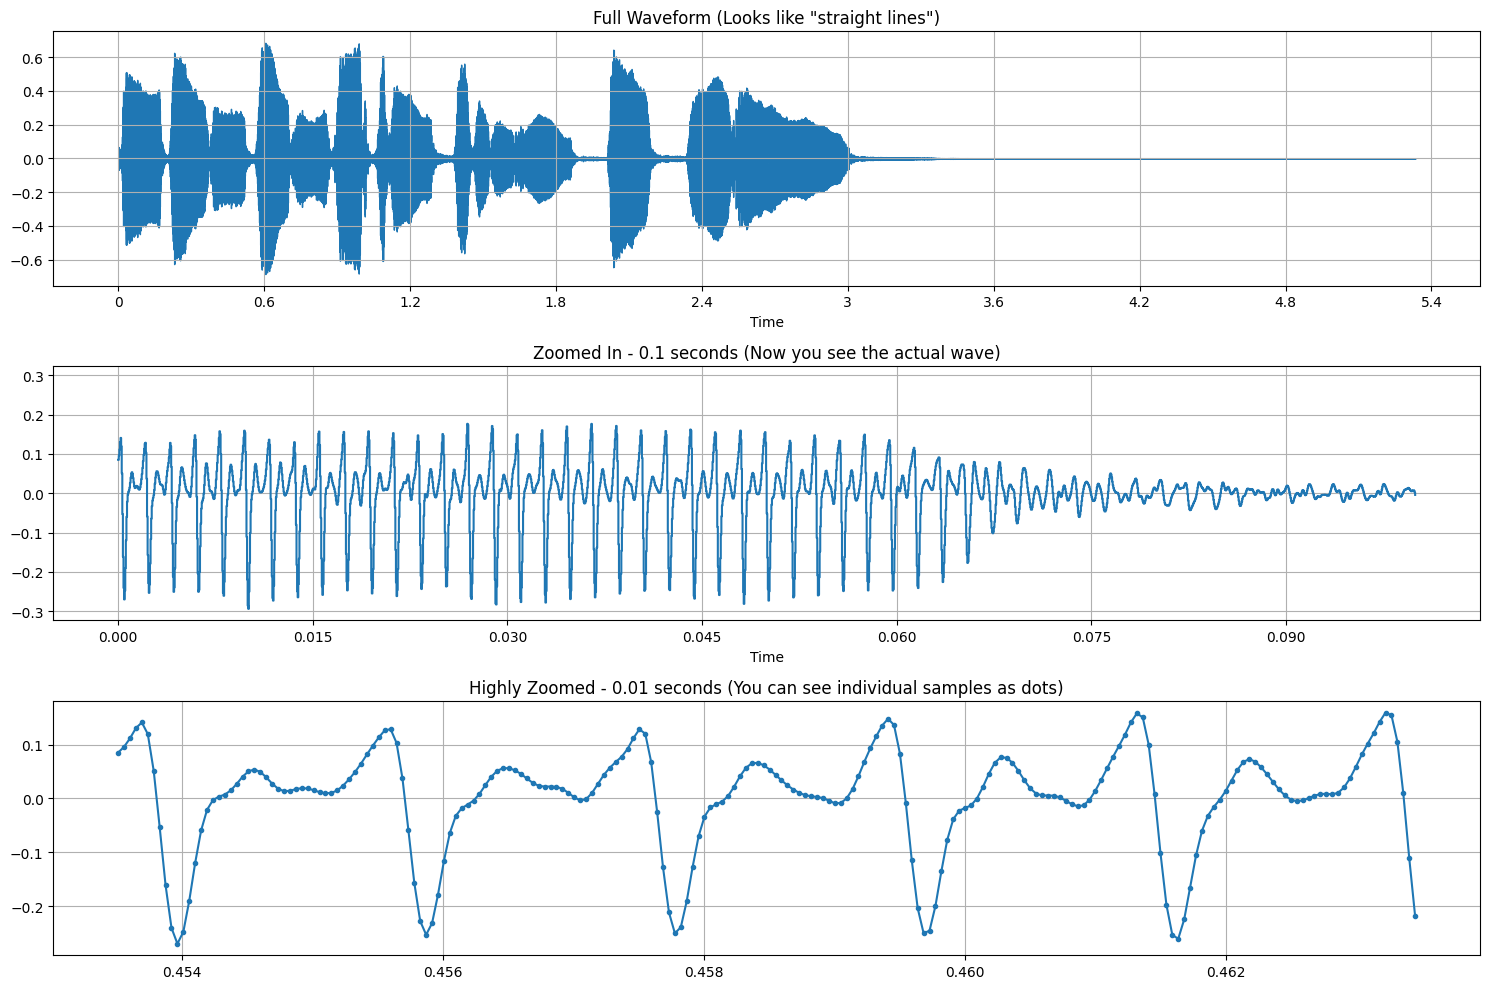

In [6]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

# Let's look at the first 20 samples (less than 1 millisecond of audio!)
print("First 20 samples of the trumpet audio:")
print(array[:20])
print(f"\nSampling rate: {sampling_rate} Hz")
print(f"Total samples: {len(array)}")
print(f"Duration: {len(array)/sampling_rate:.2f} seconds")


# Plot the whole thing (what you see now - "straight lines")
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
librosa.display.waveshow(array, sr=sampling_rate)
plt.title('Full Waveform (Looks like "straight lines")')
plt.grid(True)

# Zoom in to see 0.1 seconds
plt.subplot(3, 1, 2)
start_sample = 10000  # Adjust this to explore different regions
end_sample = start_sample + int(0.1 * sampling_rate)  # 0.1 seconds
librosa.display.waveshow(array[start_sample:end_sample], sr=sampling_rate)
plt.title('Zoomed In - 0.1 seconds (Now you see the actual wave)')
plt.grid(True)

# Zoom in even more to see individual samples
plt.subplot(3, 1, 3)
start_sample = 10000
end_sample = start_sample + int(0.01 * sampling_rate)  # 0.01 seconds
time = np.arange(start_sample, end_sample) / sampling_rate
plt.plot(time, array[start_sample:end_sample], 'o-', markersize=3)
plt.title('Highly Zoomed - 0.01 seconds (You can see individual samples as dots)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
max_idx = np.argmax(np.abs(array))  # Find index of maximum amplitude
print(f"\nAround the maximum amplitude (sample {max_idx}):")
print(f"Values around index {max_idx}:")
print(array[max_idx-5:max_idx+3])


Around the maximum amplitude (sample 13347):
Values around index 13347:
[ 0.5262841   0.58299327  0.30936638 -0.11415972 -0.4965418  -0.6847599
 -0.6283339  -0.40721864]


In [8]:
# Let's examine some actual amplitude values
print("First 10 amplitude values:")
for i in range(10):
    print(f"Sample {i}: {array[i]:.4f}")

print(f"\nTotal number of samples: {len(array):,}")
print(f"Audio duration: {len(array)/sampling_rate:.2f} seconds")

# Find where there's a big jump that might create a "vertical line"
differences = np.abs(np.diff(array))
big_jump_idx = np.argmax(differences)
print(f"\nBiggest amplitude jump: {differences[big_jump_idx]:.4f}")
print(f"  From {array[big_jump_idx]:.4f} to {array[big_jump_idx+1]:.4f}")
print(f"  Time: {big_jump_idx/sampling_rate:.3f}s to {(big_jump_idx+1)/sampling_rate:.3f}s")

First 10 amplitude values:
Sample 0: -0.0014
Sample 1: -0.0004
Sample 2: -0.0004
Sample 3: 0.0001
Sample 4: 0.0000
Sample 5: -0.0002
Sample 6: -0.0004
Sample 7: 0.0001
Sample 8: 0.0005
Sample 9: 0.0015

Total number of samples: 117,601
Audio duration: 5.33 seconds

Biggest amplitude jump: 0.4235
  From 0.3094 to -0.1142
  Time: 0.605s to 0.605s


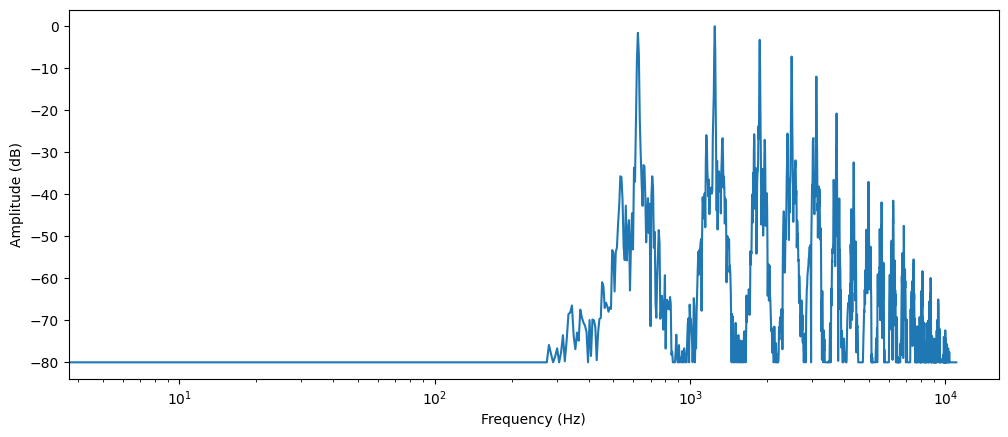

In [9]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

STFT shape: (1025, 230)
Number of frequency bins: 1025
Number of time frames: 230


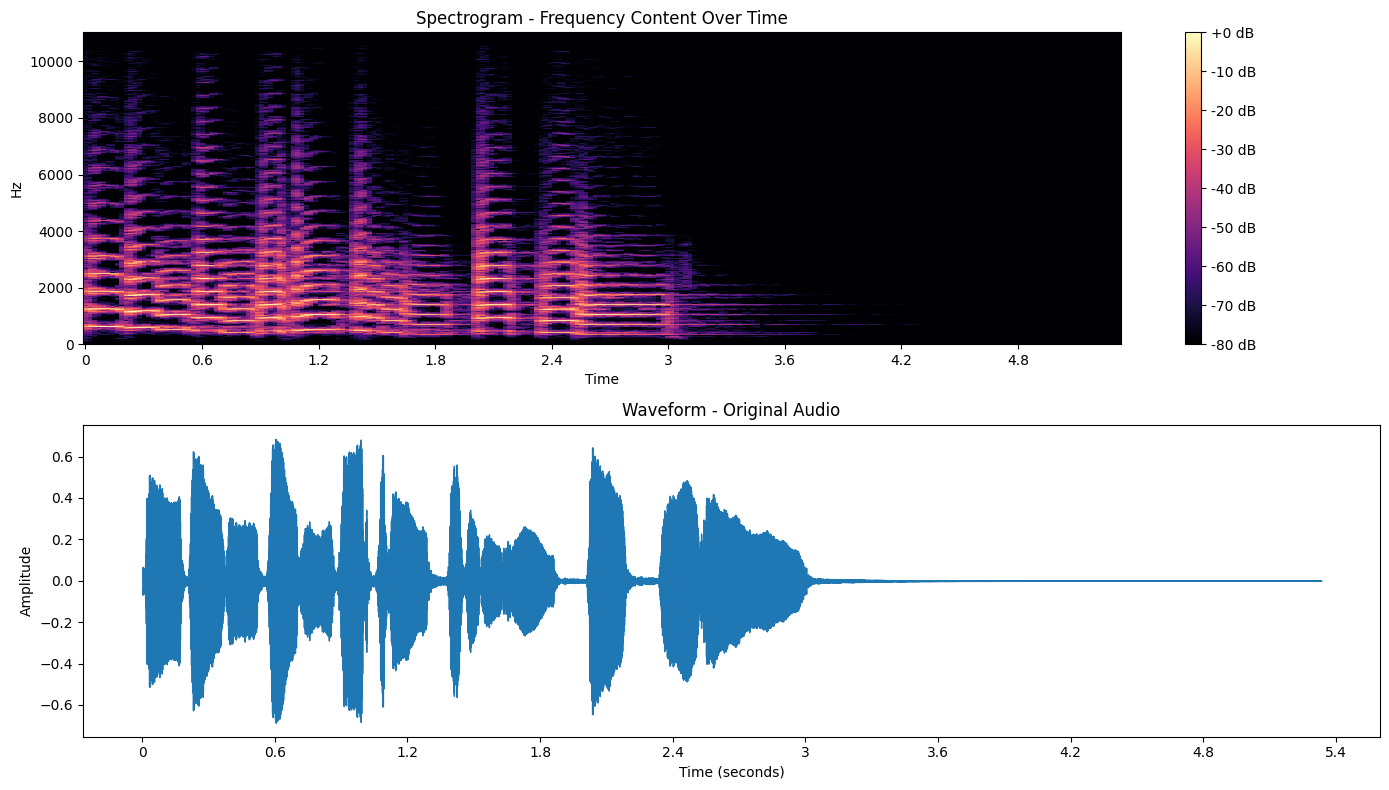

In [10]:

# Compute STFT with explicit parameters so we understand what's happening
D = librosa.stft(array, n_fft=2048, hop_length=512, win_length=2048)

print(f"STFT shape: {D.shape}")
print(f"Number of frequency bins: {D.shape[0]}")
print(f"Number of time frames: {D.shape[1]}")

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Create a clearer visualization
plt.figure(figsize=(14, 8))

# Plot 1: Spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz", sr=sampling_rate, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Frequency Content Over Time')

# Plot 2: Waveform for reference
plt.subplot(2, 1, 2)
librosa.display.waveshow(array, sr=sampling_rate)
plt.title('Waveform - Original Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

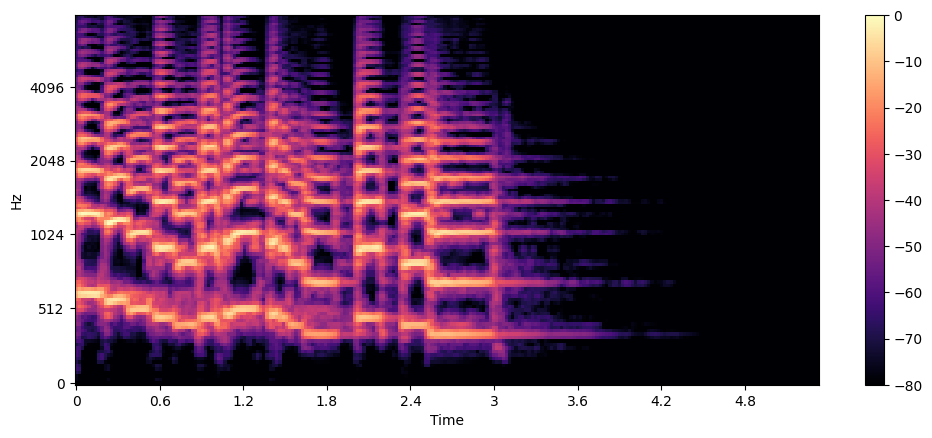

In [11]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

In [16]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

In [ ]:
example = minds[0]

id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

In [ ]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

### Testing downsampling and upsampling

Original sample rate: 16000


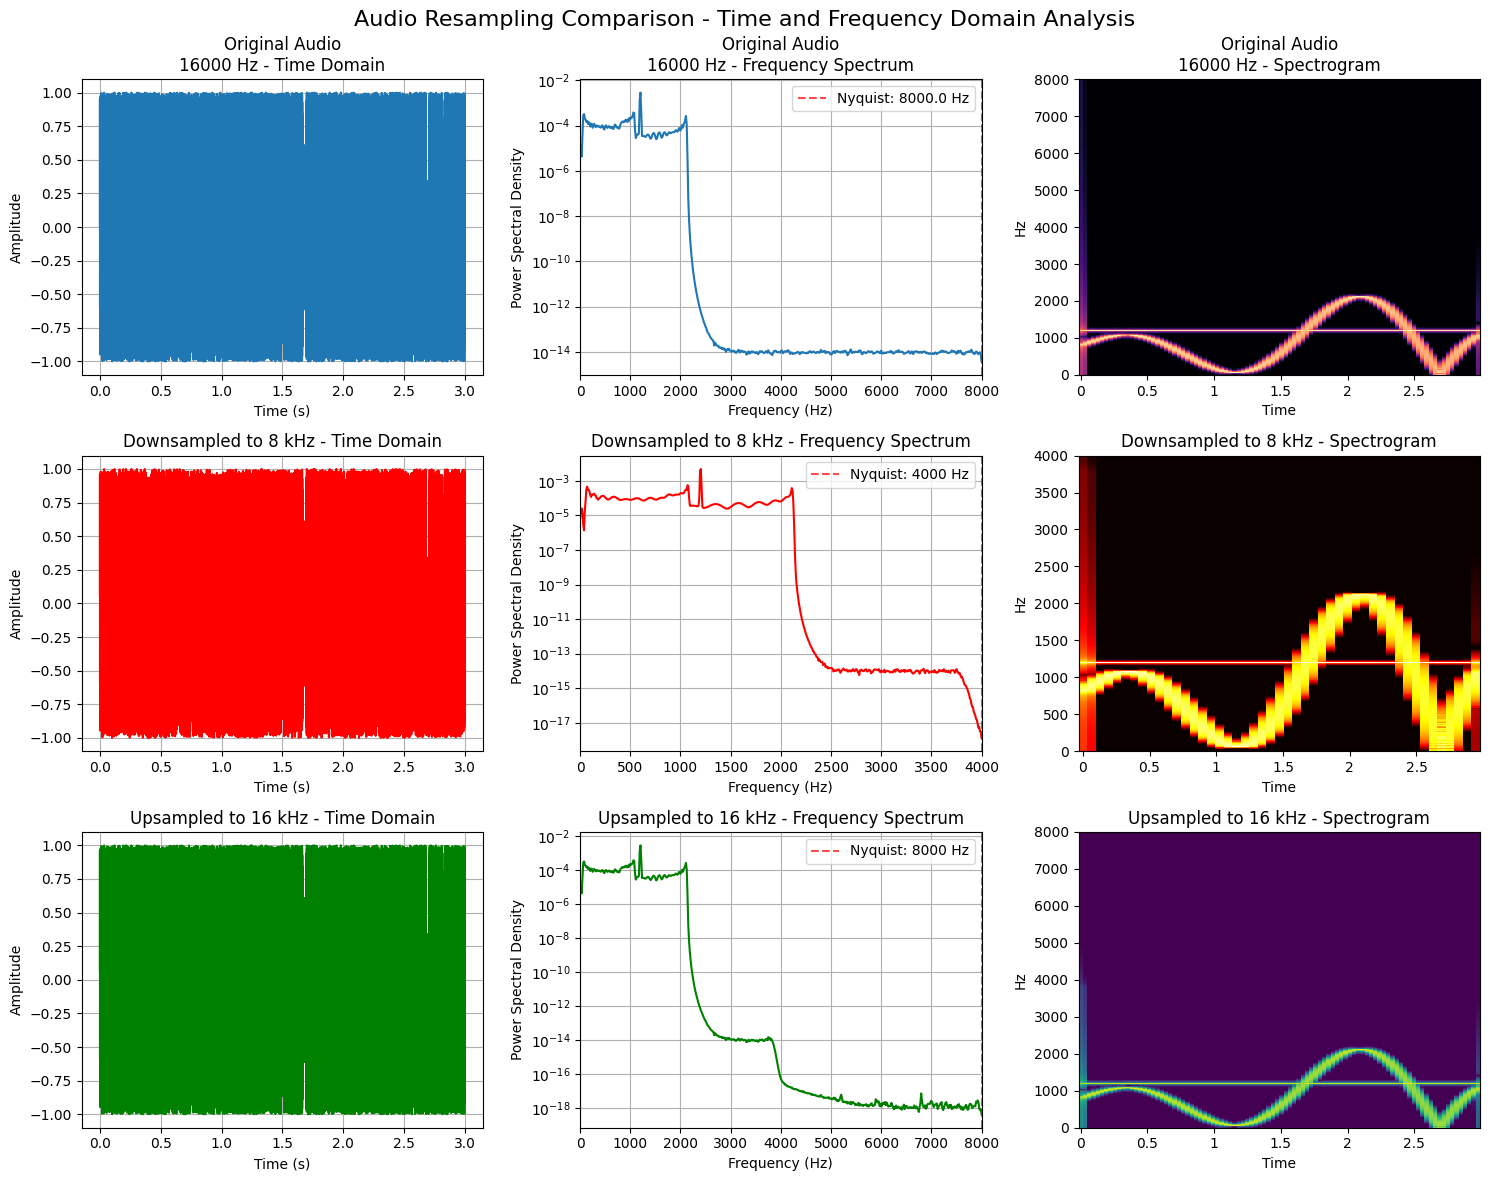


=== KEY OBSERVATIONS ===
1. Original audio length: 48000 samples
2. Downsampled (8k) length: 24000 samples
3. Upsampled (16k) length: 48000 samples
4. Maximum frequency in original: 8000.0 Hz
5. Maximum frequency preserved in 8k version: 4000 Hz
6. High-frequency content above 4000 Hz is PERMANENTLY LOST in downsampling
7. Upsampling cannot recover the lost high frequencies


In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import librosa.display

# Load audio at its original sample rate
audio, original_sr = librosa.load('test_siren.wav', sr=None)

print("Original sample rate:", original_sr)

# Your resampling process
audio_8k = librosa.resample(audio, orig_sr=original_sr, target_sr=8000)
audio_16k = librosa.resample(audio_8k, orig_sr=8000, target_sr=16000)

# Save the results
sf.write('downsampled_8k.wav', audio_8k, 8000)
sf.write('upsampled_16k.wav', audio_16k, 16000)

# Create a comprehensive comparison plot
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Audio Resampling Comparison - Time and Frequency Domain Analysis', fontsize=16)

# Plot 1: Original Audio - Time Domain
t_original = np.arange(len(audio)) / original_sr
axes[0, 0].plot(t_original, audio)
axes[0, 0].set_title(f'Original Audio\n{original_sr} Hz - Time Domain')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].grid(True)

# Plot 2: Downsampled 8k - Time Domain
t_8k = np.arange(len(audio_8k)) / 8000
axes[1, 0].plot(t_8k, audio_8k, color='red')
axes[1, 0].set_title('Downsampled to 8 kHz - Time Domain')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].grid(True)

# Plot 3: Upsampled 16k - Time Domain
t_16k = np.arange(len(audio_16k)) / 16000
axes[2, 0].plot(t_16k, audio_16k, color='green')
axes[2, 0].set_title('Upsampled to 16 kHz - Time Domain')
axes[2, 0].set_xlabel('Time (s)')
axes[2, 0].set_ylabel('Amplitude')
axes[2, 0].grid(True)

# Frequency Domain Analysis
# Plot 4: Original Audio - Frequency Spectrum
f_original, Pxx_original = signal.welch(audio, original_sr, nperseg=1024)
axes[0, 1].semilogy(f_original, Pxx_original)
axes[0, 1].set_title(f'Original Audio\n{original_sr} Hz - Frequency Spectrum')
axes[0, 1].set_xlabel('Frequency (Hz)')
axes[0, 1].set_ylabel('Power Spectral Density')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, original_sr/2)
# Mark Nyquist frequency
axes[0, 1].axvline(x=original_sr/2, color='r', linestyle='--', alpha=0.7, label=f'Nyquist: {original_sr/2} Hz')
axes[0, 1].legend()

# Plot 5: Downsampled 8k - Frequency Spectrum
f_8k, Pxx_8k = signal.welch(audio_8k, 8000, nperseg=1024)
axes[1, 1].semilogy(f_8k, Pxx_8k, color='red')
axes[1, 1].set_title('Downsampled to 8 kHz - Frequency Spectrum')
axes[1, 1].set_xlabel('Frequency (Hz)')
axes[1, 1].set_ylabel('Power Spectral Density')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 8000/2)
axes[1, 1].axvline(x=4000, color='r', linestyle='--', alpha=0.7, label='Nyquist: 4000 Hz')
axes[1, 1].legend()

# Plot 6: Upsampled 16k - Frequency Spectrum
f_16k, Pxx_16k = signal.welch(audio_16k, 16000, nperseg=1024)
axes[2, 1].semilogy(f_16k, Pxx_16k, color='green')
axes[2, 1].set_title('Upsampled to 16 kHz - Frequency Spectrum')
axes[2, 1].set_xlabel('Frequency (Hz)')
axes[2, 1].set_ylabel('Power Spectral Density')
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, 16000/2)
axes[2, 1].axvline(x=8000, color='r', linestyle='--', alpha=0.7, label='Nyquist: 8000 Hz')
axes[2, 1].legend()

# Spectrograms
# Plot 7: Original Audio - Spectrogram
S_original = librosa.stft(audio)
S_db_original = librosa.amplitude_to_db(np.abs(S_original), ref=np.max)
librosa.display.specshow(S_db_original, sr=original_sr, x_axis='time', y_axis='hz', ax=axes[0, 2])
axes[0, 2].set_title(f'Original Audio\n{original_sr} Hz - Spectrogram')
axes[0, 2].set_ylim(0, original_sr/2)

# Plot 8: Downsampled 8k - Spectrogram
S_8k = librosa.stft(audio_8k)
S_db_8k = librosa.amplitude_to_db(np.abs(S_8k), ref=np.max)
librosa.display.specshow(S_db_8k, sr=8000, x_axis='time', y_axis='hz', ax=axes[1, 2], cmap='hot')
axes[1, 2].set_title('Downsampled to 8 kHz - Spectrogram')
axes[1, 2].set_ylim(0, 4000)

# Plot 9: Upsampled 16k - Spectrogram
S_16k = librosa.stft(audio_16k)
S_db_16k = librosa.amplitude_to_db(np.abs(S_16k), ref=np.max)
librosa.display.specshow(S_db_16k, sr=16000, x_axis='time', y_axis='hz', ax=axes[2, 2], cmap='viridis')
axes[2, 2].set_title('Upsampled to 16 kHz - Spectrogram')
axes[2, 2].set_ylim(0, 8000)

plt.tight_layout()
plt.show()

# Print key observations
print("\n=== KEY OBSERVATIONS ===")
print(f"1. Original audio length: {len(audio)} samples")
print(f"2. Downsampled (8k) length: {len(audio_8k)} samples") 
print(f"3. Upsampled (16k) length: {len(audio_16k)} samples")
print(f"4. Maximum frequency in original: {original_sr/2} Hz")
print(f"5. Maximum frequency preserved in 8k version: 4000 Hz")
print(f"6. High-frequency content above 4000 Hz is PERMANENTLY LOST in downsampling")
print(f"7. Upsampling cannot recover the lost high frequencies")

### High frequency copntent that's perceptually irrelevant

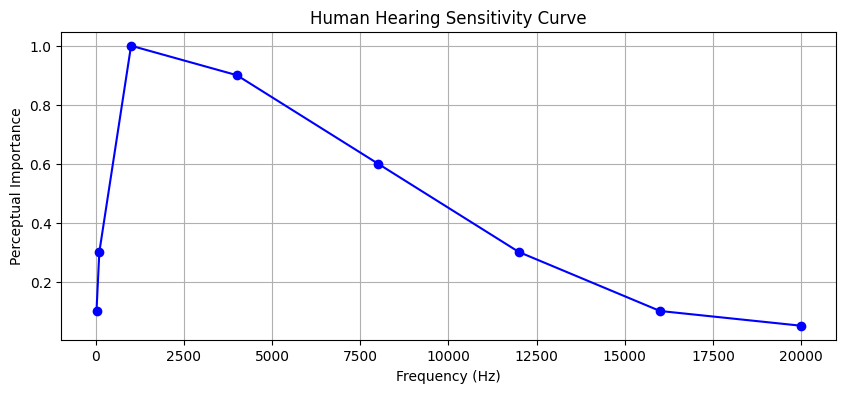

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Human hearing range: 20 Hz to 20,000 Hz (for young, healthy ears)
hearing_range = (20, 20000)

# But perceptual importance varies dramatically:
frequencies = np.array([20, 100, 1000, 4000, 8000, 12000, 16000, 20000])
perceptual_importance = np.array([0.1, 0.3, 1.0, 0.9, 0.6, 0.3, 0.1, 0.05])

plt.figure(figsize=(10, 4))
plt.plot(frequencies, perceptual_importance, 'bo-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Perceptual Importance')
plt.title('Human Hearing Sensitivity Curve')
plt.grid(True)
plt.show()

In [3]:
# Example: What high-frequency "noise" actually looks like
t = np.linspace(0, 1, 48000)

# Clean signal (voice fundamentals)
clean_signal = np.sin(2*np.pi*500*t) + 0.5*np.sin(2*np.pi*1000*t)

# High-frequency noise components
hiss_noise = 0.1 * np.random.normal(0, 1, len(t))  # Random noise > 10kHz
electrical_noise = 0.05 * np.sin(2*np.pi*15000*t)  # 15kHz interference
ultrasonic = 0.02 * np.sin(2*np.pi*25000*t)        # 25kHz - inaudible!

full_signal = clean_signal + hiss_noise + electrical_noise + ultrasonic

print("Signal composition:")
print(f"Meaningful content: {np.std(clean_signal):.3f}")
print(f"Hiss noise: {np.std(hiss_noise):.3f}")
print(f"Electrical noise: {np.std(electrical_noise):.3f}")
print(f"Ultrasonic: {np.std(ultrasonic):.3f}")

Signal composition:
Meaningful content: 0.791
Hiss noise: 0.100
Electrical noise: 0.035
Ultrasonic: 0.014


In [4]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 1.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.8/485.8 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.9/789.9 KB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [15]:
text = "Ladybugs have had important roles in culture and religion."

try:
    output = pipe(text)
    print(f"Audio array shape: {output['audio'].shape}")
    print(f"Sample rate: {output['sampling_rate']}")
    print(f"Audio array min/max: {np.min(output['audio'])}, {np.max(output['audio'])}")
except Exception as e:
    print(f"Error during generation: {e}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


Audio array shape: (1, 103360)
Sample rate: 24000
Audio array min/max: -0.2863543927669525, 0.30072763562202454


In [13]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])